<a href="https://colab.research.google.com/github/JoJoYao996/Deeplearning_with_Pytorch/blob/main/%E7%BB%8F%E5%85%B8%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings


In [2]:
warnings.filterwarnings('ignore')

# Fashion MNIST数据集

100%|██████████| 26421880/26421880 [00:02<00:00, 12302860.25it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 215224.70it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3877806.20it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5917313.51it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

训练集大小: 60000
测试集大小: 10000
类别标签: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


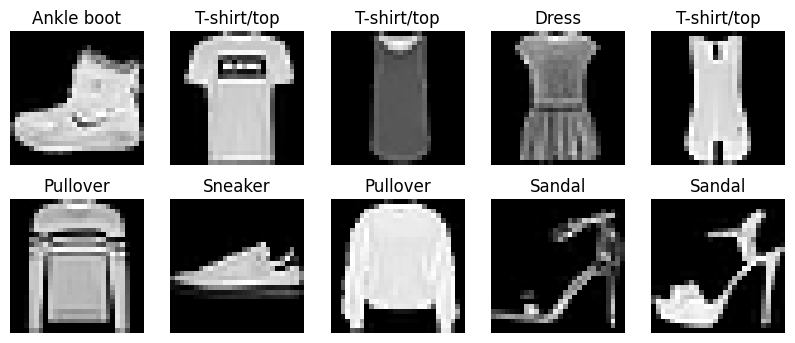

In [3]:

import torch
import torchvision
import matplotlib.pyplot as plt

# 加载Fashion-MNIST数据集
train_set = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True)

# 查看数据集大小
print(f"训练集大小: {len(train_set)}")
print(f"测试集大小: {len(test_set)}")

# 获取类别标签
labels = train_set.classes
print(f"类别标签: {labels}")

# 随机显示几个样本图像
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    image, label = train_set[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(labels[label])
    ax.axis('off')
plt.show()

# Lenet

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 定义 LeNet 模型
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5,padding=2)
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        out = self.avgpool(torch.relu(self.conv1(x)))
        out = self.avgpool(torch.relu(self.conv2(out)))
        out = out.view(out.size(0), -1)
        out = torch.sigmoid(self.fc1(out))
        out = torch.sigmoid(self.fc2(out))
        out = self.fc3(out)
        return out

# 加载 Fashion-MNIST 数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# 初始化模型、损失函数和优化器
model = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.9)



In [5]:
# 设置gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model.to(device)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Epoch [1/10], Train Loss: 0.8024, Test Loss: 1.3865, Acc: 55.48%
Epoch [2/10], Train Loss: 0.4890, Test Loss: 0.4372, Acc: 83.66%
Epoch [3/10], Train Loss: 0.3692, Test Loss: 0.3832, Acc: 85.42%
Epoch [4/10], Train Loss: 0.3307, Test Loss: 0.3728, Acc: 86.03%
Epoch [5/10], Train Loss: 0.3030, Test Loss: 0.3281, Acc: 87.72%
Epoch [6/10], Train Loss: 0.2829, Test Loss: 0.3285, Acc: 87.78%
Epoch [7/10], Train Loss: 0.2697, Test Loss: 0.3515, Acc: 87.47%
Epoch [8/10], Train Loss: 0.2560, Test Loss: 0.3193, Acc: 88.24%
Epoch [9/10], Train Loss: 0.2466, Test Loss: 0.3005, Acc: 89.02%
Epoch [10/10], Train Loss: 0.2373, Test Loss: 0.3068, Acc: 89.00%


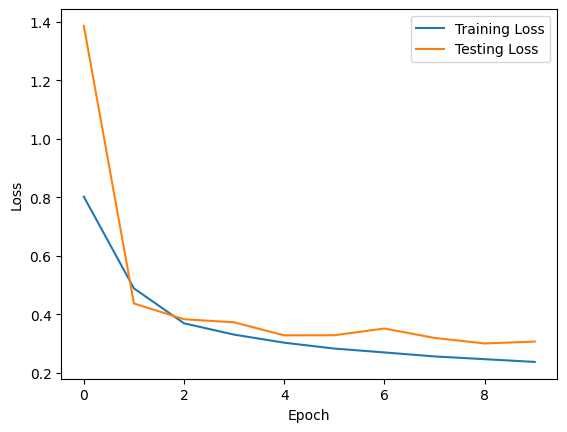

In [9]:
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0

    # 训练模型
    model.train()
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # 测试模型
    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(trainloader)
    avg_test_loss = test_loss / len(testloader)
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Acc: {correct/total*100:.2f}%")

# 绘制测试误差和训练误差曲线
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# AlexNet

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x


# 加载 Fashion-MNIST 数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((227,227)),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# 初始化AlexNet模型
model = AlexNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)



Epoch [1/10], Train Loss: 2.2963, Test Loss: 2.2134, Acc: 30.00%
Epoch [2/10], Train Loss: 0.9418, Test Loss: 0.6950, Acc: 75.43%
Epoch [3/10], Train Loss: 0.5754, Test Loss: 0.5239, Acc: 80.05%
Epoch [4/10], Train Loss: 0.4852, Test Loss: 0.4512, Acc: 83.23%
Epoch [5/10], Train Loss: 0.4302, Test Loss: 0.4255, Acc: 84.22%
Epoch [6/10], Train Loss: 0.3905, Test Loss: 0.3730, Acc: 85.98%
Epoch [7/10], Train Loss: 0.3644, Test Loss: 0.3640, Acc: 86.68%
Epoch [8/10], Train Loss: 0.3424, Test Loss: 0.3370, Acc: 87.41%
Epoch [9/10], Train Loss: 0.3253, Test Loss: 0.3261, Acc: 87.83%
Epoch [10/10], Train Loss: 0.3107, Test Loss: 0.3042, Acc: 88.74%


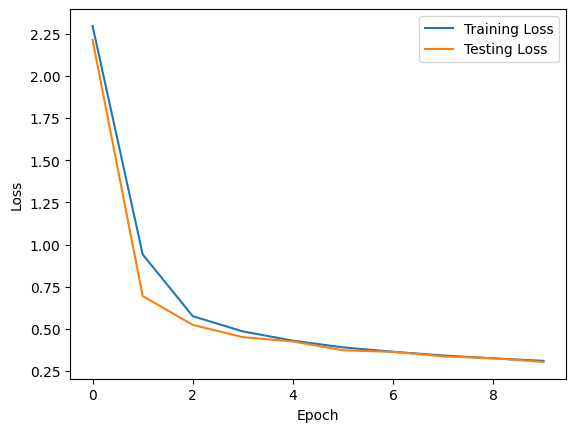

In [18]:
# 训练AlexNet模型
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0

    # 训练模型
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # 测试模型
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_train_loss = train_loss / len(train_loader)
    avg_test_loss = test_loss / len(test_loader)
    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Acc: {correct/total*100:.2f}%")

# 绘制测试误差和训练误差曲线
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VGG

## VGG块

In [19]:
import torch
import torch.nn as nn
class VGGBlock(nn.Module):
  def __init__(self, in_channel, out_channels, num_convs):
    super(VGGBlock,slef).__init__()

    layers = []
    for _ in range(num_convs):
      layers.append(nn.Conv2(in_channels, out_channels, kernel_size=3, padding=1))
      layers.append(nn.ReLU())
      in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

    self.vgg_block = nn.Sequential(*layers)
  def forward(self, x):
    return self.vgg_block(x)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 设置使用的设备为GPU，如果没有GPU则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载Fashion-MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,shuffle=False, num_workers=2)

# 定义VGG16模型
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 512 * 7 * 7)
        x = self.classifier(x)
        return x

# 创建VGG16模型实例并移动到GPU
model = VGG16().to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)



In [ ]:
# 训练模型
num_epochs = 10
train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0

    model.train()
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss /= len(trainloader)
    train_accuracy = 100.0 * train_correct / train_total
    train_losses.append(train_loss)
    train_accs.append(train_accuracy)

    test_loss = 0.0
    test_total = 0
    test_correct = 0

    model.eval()
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss /= len(testloader)
    test_accuracy = 100.0 * test_correct / test_total
    test_losses.append(test_loss)
    test_accs.append(test_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")

# 绘制训练误差和测试误差曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# 绘制训练准确率和测试准确率曲线
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_accs, label='Train Acc')
plt.plot(range(1, num_epochs+1), test_accs, label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

Epoch 1/10: Train Loss: 2.3029, Train Acc: 9.87%, Test Loss: 2.3027, Test Acc: 10.00%
